<a href="https://colab.research.google.com/github/Keerthanabs1326/PRODIGY_TrackCode_Task1/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [36]:
df = pd.read_csv('/content/Mall_Customers.csv')
data = df[['Annual Income (k$)','Spending Score (1-100)']]
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [37]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

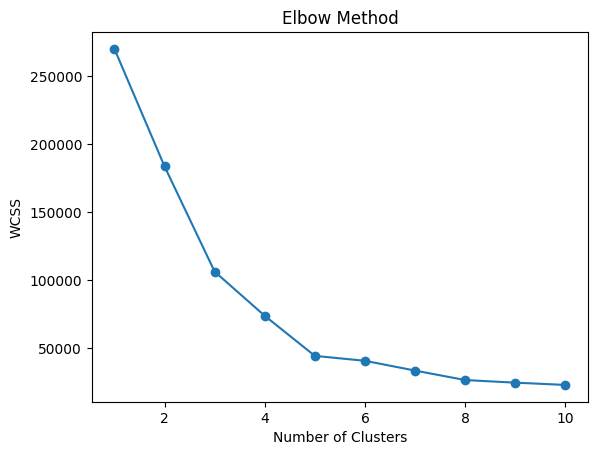

In [38]:
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)
df['Cluster']=y_kmeans

Cluster 0 : Average income, average spending.
Cluster 1:  High income, high spending.
Cluster 2 : Low income, high spending.
Cluster 3 : High income, low spending.
Cluster 4 : low income, low-spending.

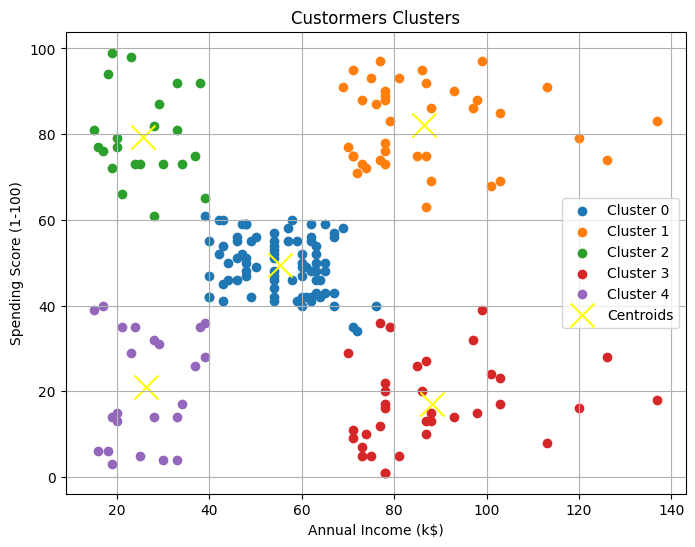

In [40]:
plt.figure(figsize=(8,6))
for i in range(5):
  plt.scatter(data[y_kmeans==i]['Annual Income (k$)'],data[y_kmeans==i]['Spending Score (1-100)'],label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',marker='x',label='Centroids')
plt.title("Custormers Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()